# TP03 Exercise 2 : System evaluation

Student names:
- Dan Yvan Baumgartner
- Jan Huber



## Imports

Import the necessary packages

In [1]:
import numpy as np             
import pandas as pd
import matplotlib.pyplot as plt
import itertools


## Reading the data

First, both the training data set and the test data set are read and stored as a _Pandas_ dataframe. Then, both data sets are separated into the actual data and the corresponding labels, and then stored in variables that will be used later. 

In [2]:
# Read the data
csv_system = r'ex2-system-a.csv'
df_system = pd.read_csv(csv_system, sep=";", header=None)

# Separate the data from the labels
df_data = df_system.iloc[:, :-2] # data
df_labels = df_system.iloc[:, -2:-1] # labels

data = df_data.values
labels = np.resize(df_labels.values, -1)

# Import system B data
csv_system = r'ex2-system-b.csv'
df_system = pd.read_csv(csv_system, sep=";", header=None)
data_b = df_system.iloc[:,0:10].values
labels_b = df_system.iloc[:,-2].values


## Overall error rate computation
**Question b : What is the overall error rate of the system ?**

The overall error rate of the system is around 11%.

In [3]:
labels_pred = np.argmax(data, axis=1)

correct_guesses = 0
for i,l in enumerate(labels):
    if l==labels_pred[i]:
        correct_guesses += 1

acc = correct_guesses/len(labels)
err = 1-acc
print('Overall error rate : {} %'.format(format(err*100,'.02f')))

Overall error rate : 10.73 %


## Confusion matrix

In [4]:
cm = np.zeros((10,10)).astype(int)

for i,l in enumerate(labels):
    cm[l,labels_pred[i]] += 1


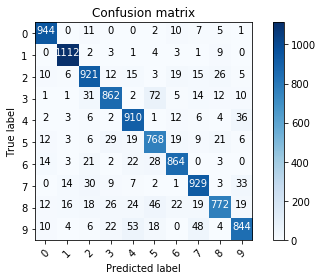

In [5]:

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

labels_str = [str(i) for i in range(10)]
plot_confusion_matrix(cm,labels_str)

## Accuracy, Recall, Precision
**Question d : What are the worst and best classes in terms of precision and recall ?**

The cell below gives the following results:
- Best accuracy : '1' (99.27%), Worst accuracy : '5' (97.00%)
- Best recall : '1' (97.97%), Worst recall : '8' (79.26%)
- Best precision : '1' (95.70%), Worst precision : '5' (81.36%)

The class '1' gives the best results for all metrics, whereas the class '5' gives two of the worst metrics.

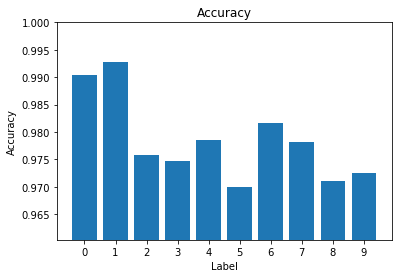

Best accuracy : '1' (99.27%), Worst accuracy : '5' (97.00%)


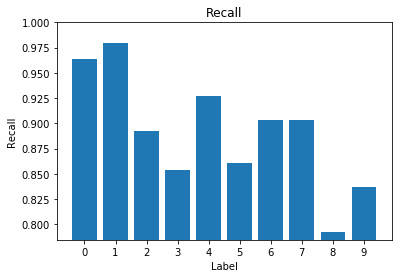

Best recall : '1' (97.97%), Worst recall : '8' (79.26%)


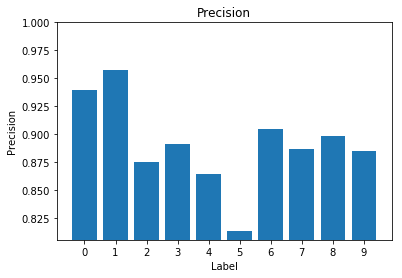

Best precision : '1' (95.70%), Worst precision : '5' (81.36%)


In [6]:
TP_k = np.zeros(10)
TN_k = np.zeros(10)
FN_k = np.zeros(10)
FP_k = np.zeros(10)
N = np.sum(cm)

for label,row in enumerate(cm):
    TP_k[label] = row[label]
    mask = (np.arange(10) % 10  != 0)
    mask = np.roll(mask,shift=label)
    TN_k[label] = np.sum(cm[np.ix_(mask,mask)])
    FN_k[label] = np.sum(row[mask])
    FP_k[label] = np.sum(cm[mask,label])
    #print(mask,'\n',cm[np.ix_(mask,mask)])
    #print(mask,'\n',np.sum(row[mask]))
    #print(mask,'\n',np.sum(cm[mask,label]))

accuracy_k = (TP_k+TN_k)/N
recall_k = TP_k/(TP_k+FN_k)
precision_k = TP_k/(TP_k+FP_k)
F1score = 2*(precision_k*recall_k)/(precision_k+recall_k)

plt.title('Accuracy')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.bar(range(10),accuracy_k,bottom=0)
plt.xticks(np.arange(10))
plt.ylim(np.min(accuracy_k)*0.99,1)
plt.show()
best,worst=np.argsort(accuracy_k)[-1], np.argsort(accuracy_k)[0]
best_val,worst_val = format(accuracy_k[best]*100,'.02f'),format(accuracy_k[worst]*100,'.02f')
print('Best accuracy : \'{}\' ({}%), Worst accuracy : \'{}\' ({}%)'.format(best,best_val,worst,worst_val))

plt.title('Recall')
plt.xlabel('Label')
plt.ylabel('Recall')
plt.bar(range(10),recall_k,bottom=0)
plt.xticks(np.arange(10))
plt.ylim(np.min(recall_k)*0.99,1)
plt.show()
best,worst=np.argsort(recall_k)[-1], np.argsort(recall_k)[0]
best_val,worst_val = format(recall_k[best]*100,'.02f'),format(recall_k[worst]*100,'.02f')
print('Best recall : \'{}\' ({}%), Worst recall : \'{}\' ({}%)'.format(best,best_val,worst,worst_val))

plt.title('Precision')
plt.xlabel('Label')
plt.ylabel('Precision')
plt.bar(range(10),precision_k,bottom=0)
plt.xticks(np.arange(10))
plt.ylim(np.min(precision_k)*0.99,1)
plt.show()
best,worst=np.argsort(precision_k)[-1], np.argsort(precision_k)[0]
best_val,worst_val = format(precision_k[best]*100,'.02f'),format(precision_k[worst]*100,'.02f')
print('Best precision : \'{}\' ({}%), Worst precision : \'{}\' ({}%)'.format(best,best_val,worst,worst_val))


## Comparison between two systems
**Question e : What is the best system between (a) and (b) in terms of error rate and F1.**

Overall error rate :
- System A : 10.73 %
- System B : 3.87 %

F1 score:
- System A : 89.07 %
- System B : 96.09 %

These results shows that the system B is better in terms of error rate and F1 score. The graph also shows that the system B is more consistant because it's spread is significantly lower.

Overall error rate :
	System A : 10.73 %
	System B : 3.87 %
F1 score:
	System A : 89.07 %
	System B : 96.09 %


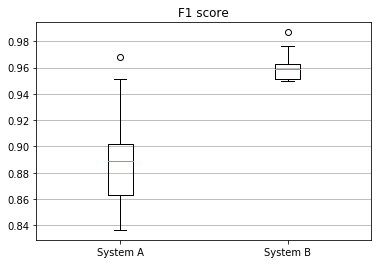

In [7]:
# Compute error rate
labels_pred_b = np.argmax(data_b, axis=1)
correct_guesses = 0
for i,l in enumerate(labels_b):
    if l==labels_pred_b[i]:
        correct_guesses += 1

# Compute confusion matrix
cm_b = np.zeros((10,10)).astype(int)
for i,l in enumerate(labels_b):
    cm_b[l,labels_pred_b[i]] += 1

TP_k_b = np.zeros(10)
TN_k_b = np.zeros(10)
FN_k_b = np.zeros(10)
FP_k_b = np.zeros(10)
N_b = np.sum(cm_b)
for label,row in enumerate(cm_b):
    TP_k_b[label] = row[label]
    mask = (np.arange(10) % 10  != 0)
    mask = np.roll(mask,shift=label)
    TN_k_b[label] = np.sum(cm_b[np.ix_(mask,mask)])
    FN_k_b[label] = np.sum(row[mask])
    FP_k_b[label] = np.sum(cm_b[mask,label])

accuracy_k_b = (TP_k_b+TN_k_b)/N_b
recall_k_b = TP_k_b/(TP_k_b+FN_k_b)
precision_k_b = TP_k_b/(TP_k_b+FP_k_b)
F1score_b = 2*(precision_k_b*recall_k_b)/(precision_k_b+recall_k_b)
        
acc_b = correct_guesses/len(labels_b)
err_b = 1-acc_b

e_a,e_b = format(err*100,'.02f'),format(err_b*100,'.02f')
f_a,f_b = format(100*np.mean(F1score),'.02f'),format(100*np.mean(F1score_b),'.02f')
print('Overall error rate :\n\tSystem A : {} %\n\tSystem B : {} %'.format(e_a,e_b))
print('F1 score:\n\tSystem A : {} %\n\tSystem B : {} %'.format(f_a,f_b))


fig, ax = plt.subplots()
plt.title('F1 score')
ret=plt.boxplot([F1score,F1score_b])
ax.set_xticklabels(['System A','System B'])
ax.yaxis.grid(True)